In [39]:
city_data = []

In [40]:
# Import Pandas, Matplotlib, and NumPy dependencies.
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

In [41]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [42]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [43]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [44]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

615

In [45]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [46]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# print(url)

In [48]:
# Import the datetime module from the datetime library.
from datetime import datetime

# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    #Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
       set_count += 1
       record_count = 1
    #Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
        city_url = url + "&q=" + city.replace(" ","+")

        # Log the URL, record, and set numbers and the city.
        print(f"Processing Record {record_count} of Set {set_count} | {city}")
        # Add 1 to the record count.
        record_count += 1

    # Run an API request for each of the cities.
        try:
            # Parse the JSON and retrieve data.
            city_weather = requests.get(city_url).json()
            # Parse out the needed data.
            city_lat = city_weather["coord"]["lat"]
            city_lng = city_weather["coord"]["lon"]
            city_max_temp = city_weather["main"]["temp_max"]
            city_humidity = city_weather["main"]["humidity"]
            city_clouds = city_weather["clouds"]["all"]
            city_wind = city_weather["wind"]["speed"]
            city_country = city_weather["sys"]["country"]
            # Convert the date to ISO standard.
            city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
            # Append the city information into city_data list.
            city_data.append({"City": city.title(),
                              "Lat": city_lat,
                              "Lng": city_lng,
                              "Max Temp": city_max_temp,
                              "Humidity": city_humidity,
                              "Cloudiness": city_clouds,
                              "Wind Speed": city_wind,
                              "Country": city_country,
                              "Date": city_date})

    # If an error is experienced, skip the city.
        except:
            print("City not found. Skipping...")
            pass

    # Indicate that Data Loading is complete.
    print("-----------------------------")
    print("Data Retrieval Complete      ")
    print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | sinnamary
Processing Record 2 of Set 13 | port elizabeth
Processing Record 3 of Set 13 | tecoanapa
Processing Record 4 of Set 13 | taolanaro
City not found. Skipping...
Processing Record 5 of Set 13 | bluff
Processing Record 6 of Set 13 | east london
Processing Record 7 of Set 13 | saint-philippe
Processing Record 8 of Set 13 | hermanus
Processing Record 9 of Set 13 | chumikan
Processing Record 10 of Set 13 | tiksi
Processing Record 11 of Set 13 | bredasdorp
Processing Record 12 of Set 13 | ushuaia
Processing Record 13 of Set 13 | kapaa
Processing Record 14 of Set 13 | esperance
Processing Record 15 of Set 13 | leh
Processing Record 16 of Set 13 | hithadhoo
Processing Record 17 of Set 13 | bengkulu
Processing Record 18 of Set 13 | zhigansk
Processing Record 19 of Set 13 | neuquen
Processing Record 20 of Set 13 | hofn
Processing Record 21 of Set 13 | kahului
Processing Record 22 of Set 13 | sever

Processing Record 36 of Set 16 | danilovka
Processing Record 37 of Set 16 | najran
Processing Record 38 of Set 16 | voh
Processing Record 39 of Set 16 | belushya guba
City not found. Skipping...
Processing Record 40 of Set 16 | nizhniy tsasuchey
Processing Record 41 of Set 16 | tasbuget
City not found. Skipping...
Processing Record 42 of Set 16 | mar del plata
Processing Record 43 of Set 16 | constitucion
Processing Record 44 of Set 16 | ilulissat
Processing Record 45 of Set 16 | siirt
Processing Record 46 of Set 16 | harbin
Processing Record 47 of Set 16 | sioux lookout
Processing Record 48 of Set 16 | gumushane
City not found. Skipping...
Processing Record 49 of Set 16 | oranjestad
Processing Record 50 of Set 16 | springdale
Processing Record 1 of Set 17 | mayumba
Processing Record 2 of Set 17 | okato
Processing Record 3 of Set 17 | hambantota
Processing Record 4 of Set 17 | codrington
Processing Record 5 of Set 17 | loandjili
Processing Record 6 of Set 17 | pevek
Processing Record 7

Processing Record 21 of Set 20 | zhicheng
Processing Record 22 of Set 20 | waterloo
Processing Record 23 of Set 20 | bangkalan
Processing Record 24 of Set 20 | amderma
City not found. Skipping...
Processing Record 25 of Set 20 | tessalit
Processing Record 26 of Set 20 | poum
Processing Record 27 of Set 20 | san felipe
Processing Record 28 of Set 20 | leningradskiy
Processing Record 29 of Set 20 | george
Processing Record 30 of Set 20 | beringovskiy
Processing Record 31 of Set 20 | khonuu
City not found. Skipping...
Processing Record 32 of Set 20 | svetlyy
Processing Record 33 of Set 20 | fortuna
Processing Record 34 of Set 20 | nantucket
Processing Record 35 of Set 20 | hamilton
Processing Record 36 of Set 20 | manggar
Processing Record 37 of Set 20 | provideniya
Processing Record 38 of Set 20 | taoudenni
Processing Record 39 of Set 20 | jetafe
Processing Record 40 of Set 20 | wahran
City not found. Skipping...
Processing Record 41 of Set 20 | kiruna
Processing Record 42 of Set 20 | ha

Processing Record 5 of Set 24 | beidao
Processing Record 6 of Set 24 | nazas
Processing Record 7 of Set 24 | quijingue
Processing Record 8 of Set 24 | mahon
Processing Record 9 of Set 24 | jackson
Processing Record 10 of Set 24 | cojumatlan
City not found. Skipping...
Processing Record 11 of Set 24 | karkaralinsk
City not found. Skipping...
Processing Record 12 of Set 24 | wulanhaote
City not found. Skipping...
Processing Record 13 of Set 24 | baijiantan
Processing Record 14 of Set 24 | beauchamps
Processing Record 15 of Set 24 | nioro
Processing Record 16 of Set 24 | port hardy
Processing Record 17 of Set 24 | keshorai patan
Processing Record 18 of Set 24 | tezu
Processing Record 19 of Set 24 | nizhniy kuranakh
Processing Record 20 of Set 24 | griffith
Processing Record 21 of Set 24 | aden
Processing Record 22 of Set 24 | la asuncion
Processing Record 23 of Set 24 | raudeberg
Processing Record 24 of Set 24 | teguldet
Processing Record 25 of Set 24 | angoche
Processing Record 26 of Set

In [49]:
len("city_data")

9

In [35]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Klaksvik,62.2266,-6.5890,41.00,81,40,18.41,FO,2021-03-28 13:36:23
1,Kaeo,-35.1000,173.7833,66.99,96,100,5.99,NZ,2021-03-28 13:36:23
2,Carnarvon,-24.8667,113.6333,78.80,89,1,6.91,AU,2021-03-28 13:36:24
3,Punta Arenas,-53.1500,-70.9167,46.40,57,20,13.80,CL,2021-03-28 13:36:02
4,Mar Del Plata,-38.0023,-57.5575,66.20,82,75,12.66,AR,2021-03-28 13:36:24
5,Vieux-Habitants,16.0589,-61.7659,82.40,65,75,13.80,GP,2021-03-28 13:36:24
6,Mahon,39.8885,4.2658,62.60,51,0,13.80,ES,2021-03-28 13:31:58
7,Chuy,-33.6971,-53.4616,70.86,82,59,7.67,UY,2021-03-28 13:36:24
8,New Norfolk,-42.7826,147.0587,54.00,62,41,5.01,AU,2021-03-28 13:36:25
9,Rikitea,-23.1203,-134.9692,78.06,75,8,16.08,PF,2021-03-28 13:36:25


In [37]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Klaksvik,FO,2021-03-28 13:36:23,62.2266,-6.5890,41.00,81,40,18.41
1,Kaeo,NZ,2021-03-28 13:36:23,-35.1000,173.7833,66.99,96,100,5.99
2,Carnarvon,AU,2021-03-28 13:36:24,-24.8667,113.6333,78.80,89,1,6.91
3,Punta Arenas,CL,2021-03-28 13:36:02,-53.1500,-70.9167,46.40,57,20,13.80
4,Mar Del Plata,AR,2021-03-28 13:36:24,-38.0023,-57.5575,66.20,82,75,12.66
5,Vieux-Habitants,GP,2021-03-28 13:36:24,16.0589,-61.7659,82.40,65,75,13.80
6,Mahon,ES,2021-03-28 13:31:58,39.8885,4.2658,62.60,51,0,13.80
7,Chuy,UY,2021-03-28 13:36:24,-33.6971,-53.4616,70.86,82,59,7.67
8,New Norfolk,AU,2021-03-28 13:36:25,-42.7826,147.0587,54.00,62,41,5.01
9,Rikitea,PF,2021-03-28 13:36:25,-23.1203,-134.9692,78.06,75,8,16.08


In [38]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [52]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

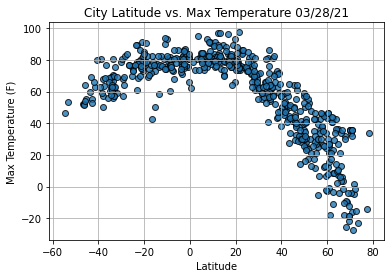

In [53]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

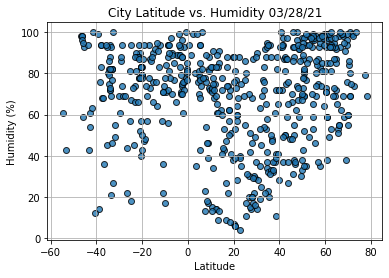

In [54]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

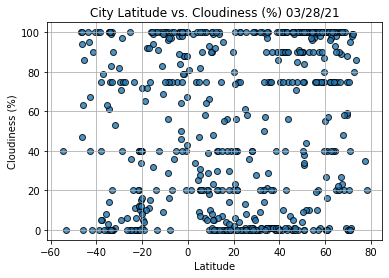

In [55]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

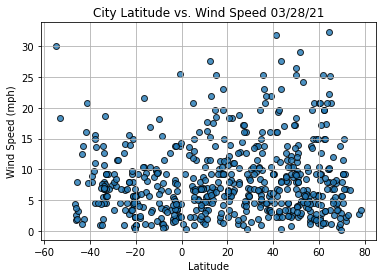

In [56]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()